<a href="https://colab.research.google.com/github/Jagadishchandra17/Deep-Learning-AI-capstone-project-using-Keras/blob/main/_1_1_Loading_Data_py_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning AI Capstone Project usingg Keras**

## Introduction


Crack detection has vital importance for structural health monitoring and inspection. In this series of labs, you learn everything you need to efficiently build a classifier using a pre-trained model that would detect cracks in images of concrete. For problem formulation, we will denote images of cracked concrete as the positive class and images of concrete with no cracks as the negative class.




## Import Libraries and Packages


Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.


In [ ]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork

from PIL import Image

## Download Data


For your convenience, I have placed the data on a server which you can retrieve and unzip easily using the **skillsnetwork.prepare** command. So let's run the following line of code to get the data. Given the large size of the image dataset, it might take some time depending on your internet speed.


In [ ]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '.'


Now, you should see two folders appear in the left pane: *Positive* and *Negative*. *Negative* is the negative class like we defined it earlier and it represents the concrete images with no cracks. *Positive* on the other hand is the positive class and represents the concrete images with cracks.


**Important Note**: There are thousands and thousands of images in each folder, so please don't attempt to double click on the folders. This may consume all of your memory and you may end up with a **50*** error. So please **DO NOT DO IT**.


## Load Images


Next, we will use the standard approach of loading all images into memory and demonstrate how this approach is not efficient at all when it comes to building deep learning models for classifying images.


Let's start by reading in the negative images. First, we will use **os.scandir** to build an iterator to iterate through *./Negative* directory that contains all the images with no cracks.


In [ ]:
negative_files = os.scandir('./Negative')
negative_files

Then, we will grab the first file in the directory.


In [ ]:
file_name = next(negative_files)
file_name

<DirEntry '12595.jpg'>

Since the directory can contain elements that are not files, we will only read the element if it is a file.


In [ ]:
os.path.isfile(file_name)

True

Get the image name.


In [ ]:
image_name = str(file_name).split("'")[1]
image_name

'12595.jpg'

Read in the image data.


array([[[199, 190, 181],
        [204, 195, 186],
        [212, 203, 194],
        ...,
        [181, 176, 170],
        [181, 176, 170],
        [180, 175, 169]],

       [[196, 187, 178],
        [201, 192, 183],
        [209, 200, 191],
        ...,
        [178, 173, 167],
        [177, 172, 166],
        [177, 172, 166]],

       [[192, 183, 174],
        [197, 188, 179],
        [205, 196, 187],
        ...,
        [173, 168, 162],
        [173, 168, 162],
        [173, 168, 162]],

       ...,

       [[195, 192, 185],
        [194, 191, 184],
        [194, 191, 184],
        ...,
        [176, 168, 157],
        [178, 170, 159],
        [180, 172, 161]],

       [[192, 189, 182],
        [192, 189, 182],
        [192, 189, 182],
        ...,
        [178, 170, 159],
        [180, 172, 161],
        [182, 174, 163]],

       [[190, 187, 180],
        [190, 187, 180],
        [189, 186, 179],
        ...,
        [180, 172, 161],
        [183, 175, 164],
        [185, 177, 166]]], dtype=uint8)
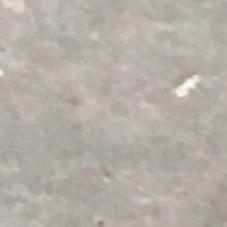

In [ ]:
image_data = plt.imread('./Negative/{}'.format(image_name))
image_data

### **Question**: What is the dimension of a single image according to **image_data**?


In [ ]:
## You can use this cell to type your code to answer the above question
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(227, 227, 3)


Let's view the image.


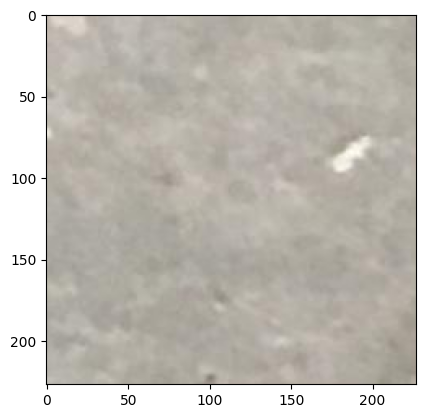

In [ ]:
plt.imshow(image_data)

Now that we are familiar with the process of reading in an image data, let's loop through all the image in the *./Negative* directory and read them all in and save them in the list **negative_images**. We will also time it to see how long it takes to read in all the images.


In [ ]:
%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('./Negative/{}'.format(image_name))
        negative_images.append(image_data)

negative_images = np.array(negative_images)

CPU times: user 12.6 s, sys: 5.27 s, total: 17.9 s
Wall time: 18.1 s


Oops! The **KERNEL DIED** due to an out-of-memory error. Since the kernel died, you may have to run the above cell to load the libraries and packages again.

Loading images into memory is definitely not the right approach when working with images as you can hit your limit on memory and other resources fairly quickly. Therefore, let's repeat the previous process but let's save the paths to the images in a variable instead of loading and saving the images themselves.


So instead of using **os.scandir**, we will use **os.listdir**.


In [ ]:
negative_images = os.listdir('./Negative')
negative_images

['12595.jpg',
 '09801.jpg',
 '19003.jpg',
 '00048.jpg',
 '05330.jpg',
 '13124.jpg',
 '04797.jpg',
 '19725.jpg',
 '11430.jpg',
 '18703.jpg',
 '13430.jpg',
 '17319.jpg',
 '11455.jpg',
 '11246.jpg',
 '00353.jpg',
 '10314.jpg',
 '18493.jpg',
 '01213.jpg',
 '10011.jpg',
 '16613.jpg',
 '10502.jpg',
 '10382.jpg',
 '06273.jpg',
 '17725.jpg',
 '13354.jpg',
 '13146.jpg',
 '12049.jpg',
 '05910.jpg',
 '02628.jpg',
 '15004.jpg',
 '18456.jpg',
 '18476.jpg',
 '12306.jpg',
 '16600.jpg',
 '19826.jpg',
 '17629.jpg',
 '00892.jpg',
 '15205.jpg',
 '10583.jpg',
 '00957.jpg',
 '04118.jpg',
 '18413.jpg',
 '11338.jpg',
 '11623.jpg',
 '18370.jpg',
 '10538.jpg',
 '10398.jpg',
 '10507.jpg',
 '03568.jpg',
 '09107.jpg',
 '18083.jpg',
 '12396.jpg',
 '05747.jpg',
 '07770.jpg',
 '07174.jpg',
 '06272.jpg',
 '04459.jpg',
 '11942.jpg',
 '19045.jpg',
 '09786.jpg',
 '12904.jpg',
 '14658.jpg',
 '13988.jpg',
 '16551.jpg',
 '03080.jpg',
 '14969.jpg',
 '17419.jpg',
 '13568.jpg',
 '08114.jpg',
 '18176.jpg',
 '09984.jpg',
 '0256

Notice how the images are not sorted, so let's call the <code>sort</code> method to sort the images.


In [ ]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Before we can show an image, we need to open it, which we can do using the **Image** module in the **PIL** library. So to open the first image, we run the following:


In [ ]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

Then to view the image, you can simply run:


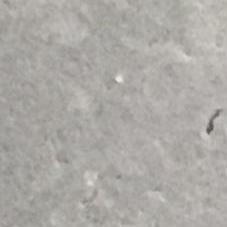

In [ ]:
image_data

or use the <code>imshow</code> method as follows:


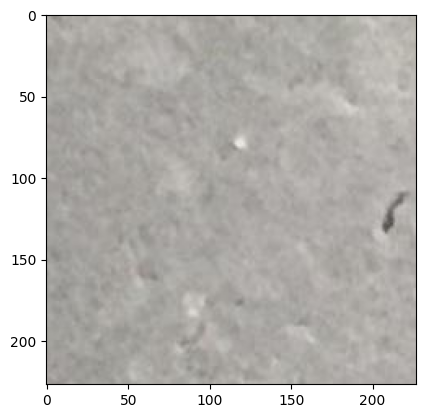

In [ ]:
plt.imshow(image_data)

Let's loop through all the images in the <code>./Negative</code> directory and add save their paths.


In [ ]:
negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./Negative/00001.jpg',
 './Negative/00002.jpg',
 './Negative/00003.jpg',
 './Negative/00004.jpg',
 './Negative/00005.jpg',
 './Negative/00006.jpg',
 './Negative/00007.jpg',
 './Negative/00008.jpg',
 './Negative/00009.jpg',
 './Negative/00010.jpg',
 './Negative/00011.jpg',
 './Negative/00012.jpg',
 './Negative/00013.jpg',
 './Negative/00014.jpg',
 './Negative/00015.jpg',
 './Negative/00016.jpg',
 './Negative/00017.jpg',
 './Negative/00018.jpg',
 './Negative/00019.jpg',
 './Negative/00020.jpg',
 './Negative/00021.jpg',
 './Negative/00022.jpg',
 './Negative/00023.jpg',
 './Negative/00024.jpg',
 './Negative/00025.jpg',
 './Negative/00026.jpg',
 './Negative/00027.jpg',
 './Negative/00028.jpg',
 './Negative/00029.jpg',
 './Negative/00030.jpg',
 './Negative/00031.jpg',
 './Negative/00032.jpg',
 './Negative/00033.jpg',
 './Negative/00034.jpg',
 './Negative/00035.jpg',
 './Negative/00036.jpg',
 './Negative/00037.jpg',
 './Negative/00038.jpg',
 './Negative/00039.jpg',
 './Negative/00040.jpg',


Let's check how many images with no cracks exist in the dataset.


In [ ]:
len(negative_images_dir)

20000

### Question: Show the next four images.


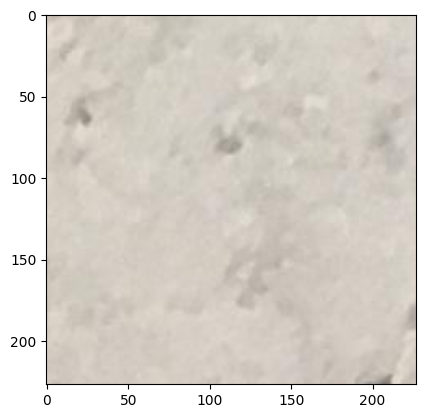

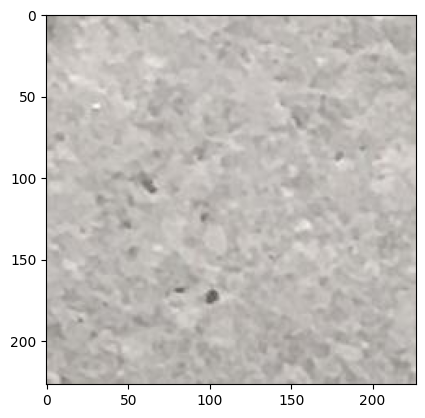

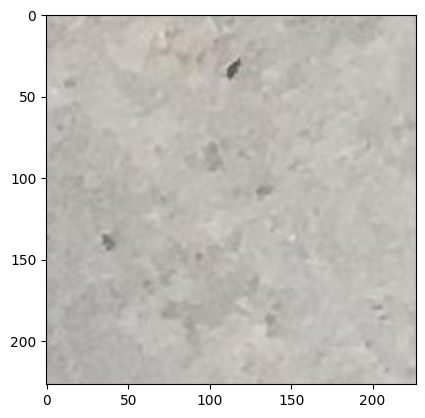

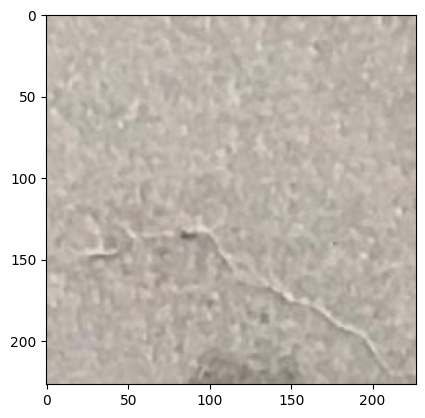

In [ ]:
## You can use this cell to type your code to answer the above question

for file in negative_images_dir[1:5]:
    image_data = Image.open(file)
    plt.imshow(image_data)
    plt.show()







**Your turn**: Save the paths to all the images in the *./Positive* directory in a list called **positive_images_dir**. Make sure to sort the paths.


In [ ]:
Positive_files = os.scandir('./Positive')
Positive_files


In [ ]:
file_name = next(Positive_files)
file_name

<DirEntry '11885_1.jpg'>

In [ ]:
os.path.isfile(file_name)

image_name = str(file_name).split("'")[1]
image_name

'11885_1.jpg'

array([[[198, 193, 189],
        [198, 193, 189],
        [199, 194, 190],
        ...,
        [214, 209, 205],
        [210, 205, 201],
        [205, 200, 196]],

       [[201, 196, 192],
        [200, 195, 191],
        [200, 195, 191],
        ...,
        [213, 208, 204],
        [210, 205, 201],
        [205, 200, 196]],

       [[205, 200, 196],
        [204, 199, 195],
        [203, 198, 194],
        ...,
        [212, 207, 203],
        [210, 205, 201],
        [207, 202, 198]],

       ...,

       [[194, 189, 185],
        [188, 183, 179],
        [186, 181, 177],
        ...,
        [204, 199, 195],
        [198, 193, 189],
        [195, 190, 186]],

       [[189, 184, 180],
        [184, 179, 175],
        [183, 178, 174],
        ...,
        [199, 194, 190],
        [193, 188, 184],
        [190, 185, 181]],

       [[183, 178, 174],
        [179, 174, 170],
        [180, 175, 171],
        ...,
        [192, 187, 183],
        [187, 182, 178],
        [184, 179, 175]]], dtype=uint8)
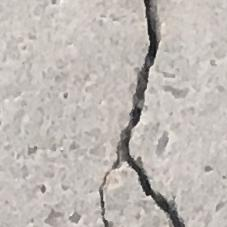

In [ ]:
image_data = plt.imread('./Positive/{}'.format(image_name))
image_data

In [ ]:
Positive_images_dir = os.listdir('./Positive')
Positive_images_dir

['11885_1.jpg',
 '09801.jpg',
 '00048.jpg',
 '05330.jpg',
 '04797.jpg',
 '19725.jpg',
 '11574_1.jpg',
 '18220_1.jpg',
 '00353.jpg',
 '12407_1.jpg',
 '01213.jpg',
 '10132_1.jpg',
 '06273.jpg',
 '13721_1.jpg',
 '05910.jpg',
 '02628.jpg',
 '18577_1.jpg',
 '19189_1.jpg',
 '18691_1.jpg',
 '19826.jpg',
 '00892.jpg',
 '16321_1.jpg',
 '17762_1.jpg',
 '00957.jpg',
 '15374_1.jpg',
 '04118.jpg',
 '14208_1.jpg',
 '11049_1.jpg',
 '03568.jpg',
 '14293_1.jpg',
 '13915_1.jpg',
 '15735_1.jpg',
 '09107.jpg',
 '05747.jpg',
 '07770.jpg',
 '07174.jpg',
 '06272.jpg',
 '04459.jpg',
 '15930_1.jpg',
 '10668_1.jpg',
 '09786.jpg',
 '11938_1.jpg',
 '13854_1.jpg',
 '18829_1.jpg',
 '18384_1.jpg',
 '03080.jpg',
 '08114.jpg',
 '17549_1.jpg',
 '17483_1.jpg',
 '09984.jpg',
 '02568.jpg',
 '19392.jpg',
 '07416.jpg',
 '10036_1.jpg',
 '12083_1.jpg',
 '18894_1.jpg',
 '15462_1.jpg',
 '11229_1.jpg',
 '11344_1.jpg',
 '06050.jpg',
 '02450.jpg',
 '08395.jpg',
 '04191.jpg',
 '09017.jpg',
 '03214.jpg',
 '00139.jpg',
 '08492.jpg',


### Question: How many images of cracked concrete exist in the *./Positive* directory?


In [ ]:
len(Positive_images_dir)

20000

### Question: Show the first four images with cracked concrete.


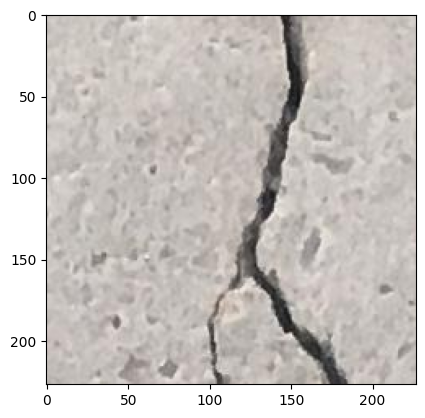

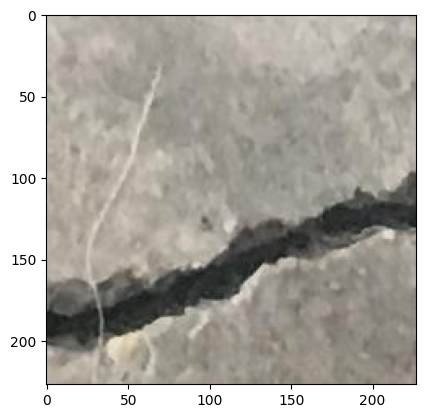

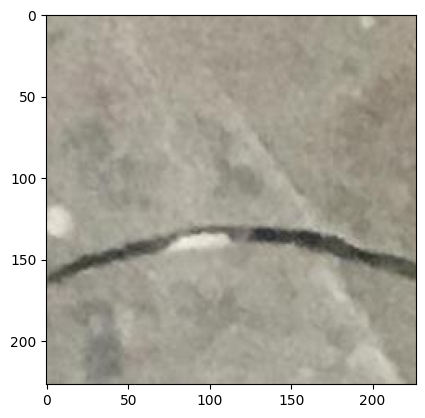

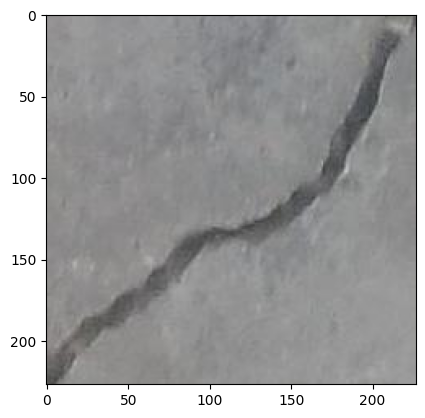

In [ ]:
## You can use this cell to type your code to answer the above question

for file in Positive_images_dir[0:4]:
    image_path = os.path.join('./Positive', file)
    image_data = Image.open(image_path)
    plt.imshow(image_data)
    plt.show()